In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pl
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("cleaned_BlackFriday_sales.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


Which city has the hights number of purchases?

C:\Users\venna\AppData\Local\Temp\ipykernel_9220\3110591925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["City_Category"],palette="dark")


<Axes: title={'center': 'population across the cities'}>

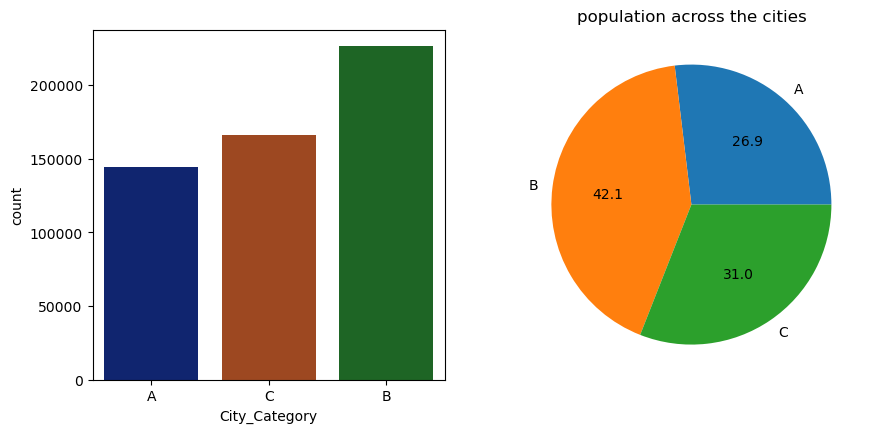

In [22]:
plt.subplot(2,2,1)
sns.countplot(x=df["City_Category"],palette="dark")
plt.subplot(2,2,2)
df.groupby("City_Category").size().plot(kind="pie",autopct="%0.1f",figsize=(10,10),title="Number of Purchases across the cities")

Based on the bar graph, it can be observed that City B registers the highest number of purchases, accounting for 42.1% of the total. This is followed by City C at 31% and City A at 26.9%, respectively.

Which city has contributed the highest income?

<Axes: title={'center': 'Total purchase'}, xlabel='City_Category'>

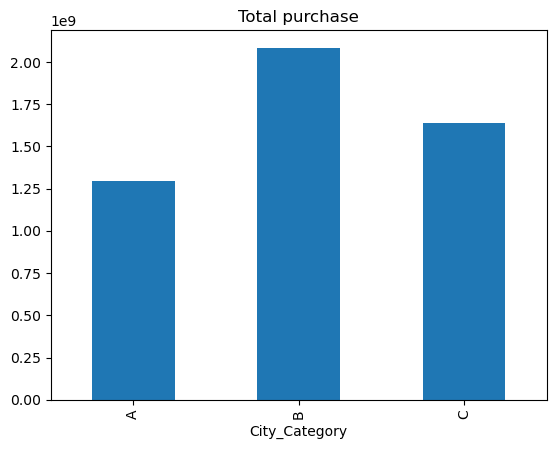

In [38]:
df.groupby('City_Category').sum()["Purchase"].plot(kind="bar",title="Total purchase")

From the above bar graph, it can be observed that City B contributed the highest to the total income, exceeding 2 billion. This is followed by City C with over 1.5 billion, and City A with more than 1.25 billion. It can be concluded that the cities with the highest number of sales also generated the highest income.

In [15]:
print("Total income:",df["Purchase"].sum())
print(df.groupby('City_Category').sum()["Purchase"])

Total income: 5017668378
City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64


Which city has the highest average income? 

<Axes: title={'center': 'Avg purchase'}, ylabel='Purchase'>

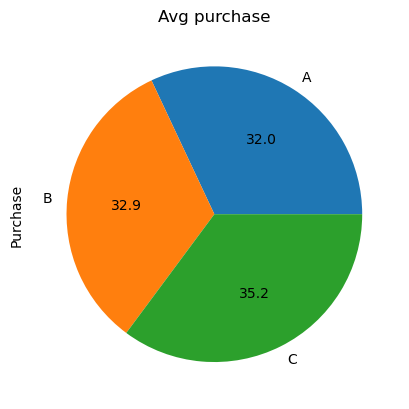

In [43]:
df.groupby('City_Category')["Purchase"].mean().plot(kind="pie",title="Avg purchase",autopct="%0.1f")

From the above pie chart, it can be observed that City C has a slightly higher average income compared to Cities B and A. This indicates that, despite purchasing fewer products, residents of City C spend more money on average per product. City B follows, with City A ranking third. Additionally, it can be noted that the average income across all the cities is approximately equal.

which city has the highest number of purchases and among the purchases who contributed the most male or female?

<Axes: xlabel='Gender', ylabel='count'>

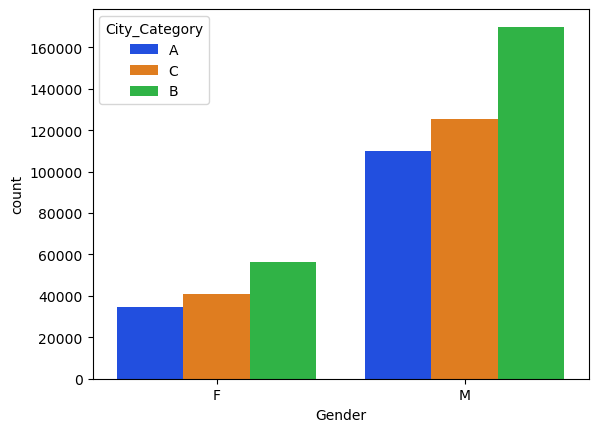

In [45]:
sns.countplot(x="Gender",hue="City_Category",palette="bright",legend=True,data=df)

From the above bar graph, we can observe that, among females across all cities, those from City B made the highest number of purchases, followed by females from City C and City A. A similar trend can be seen among males. Since both males and females in City B recorded the highest number of purchases, the city's overall purchases were the highest. Furthermore, males contributed the most significantly to the total purchases.

Which age group contributed the most number of purchases in each city?

<Axes: xlabel='City_Category', ylabel='count'>

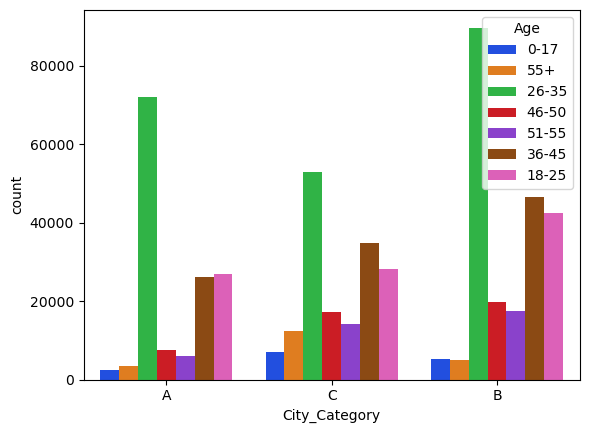

In [28]:
sns.countplot(x="City_Category",hue="Age",palette="bright",legend=True,data=df)

C:\Users\venna\AppData\Local\Temp\ipykernel_9220\1956919282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stay_In_Current_City_Years",palette="dark",legend=True,data=df)


<Axes: >

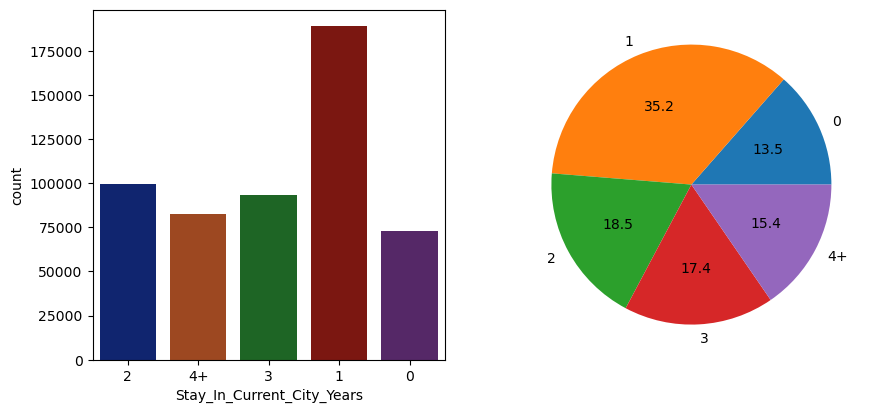

In [59]:
plt.subplot(2,2,1)
sns.countplot(x="Stay_In_Current_City_Years",palette="dark",legend=True,data=df)
plt.subplot(2,2,2)
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%0.1f",figsize=(10,10))

we can observe that the residents of a city were divided into 5 categories based on from how many years they were staying in the city. The Question is which of these category people contributed the most purchases?

From the above bar graph, it can be observed that the majority of purchases were made by individuals who have been residing in a city for 1 year, contributing to 35.2% of the total purchases. This is followed by residents who have stayed for 2 years (18.5%), 3 years (17.4%), 4 or more years (15.4%), and lastly, those who have stayed for less than 1 year (13.5%).

In each city of the resident category contribute the most purchases?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

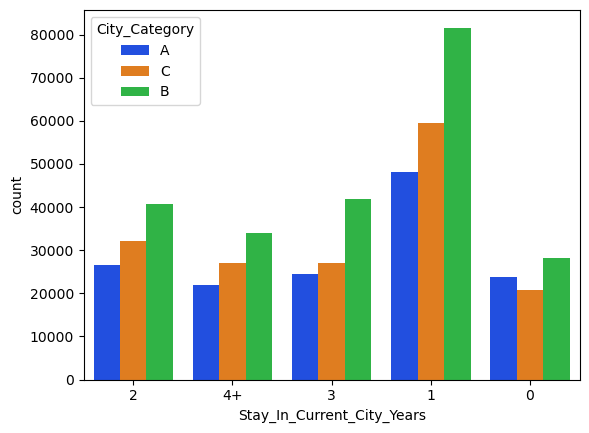

In [55]:
sns.countplot(hue="City_Category",x="Stay_In_Current_City_Years",palette="bright",legend=True,data=df)

In City A, individuals who have been residing for 1 year contribute the highest number of purchases, followed by those staying for 2 years, 3 years, less than 1 year, and finally 4 or more years.

In City B, residents staying for 1 year account for the most purchases, followed by those who have been there for 2 and 3 years, both of which show almost equal contributions. This is followed by residents staying for 4 or more years, and lastly, those staying for less than 1 year.

In City C, the highest number of purchases comes from individuals residing for 1 year, followed by those staying for 2 years. This is followed by residents of 3 and 4 or more years, who contribute nearly equal amounts, and finally, those staying for less than 1 year.

Which category of residents contributed the most income?

<Axes: xlabel='Stay_In_Current_City_Years'>

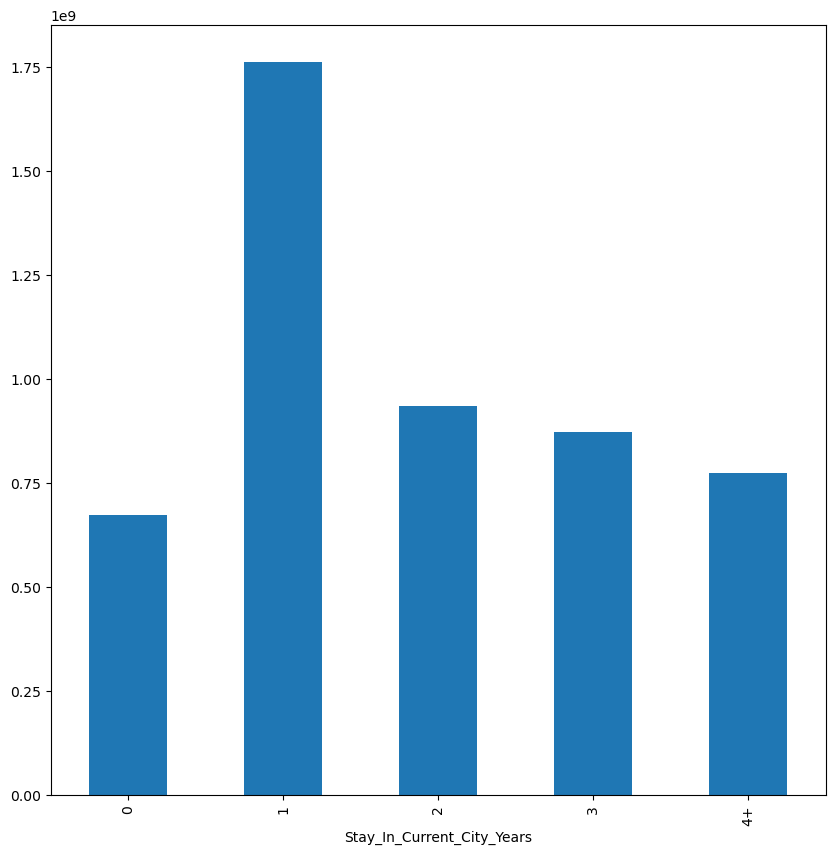

In [61]:
df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar",figsize=(10,10))

From the above bar graph, it is evident that individuals who have been residing for only one year contributed the highest income. This is attributed to their leading number of purchases. They are followed by residents staying for 2 years, 3 years, 4 or more years, and finally, those residing for less than 1 year.

which category of residents spend the most on their purchases?

<Axes: xlabel='Stay_In_Current_City_Years'>

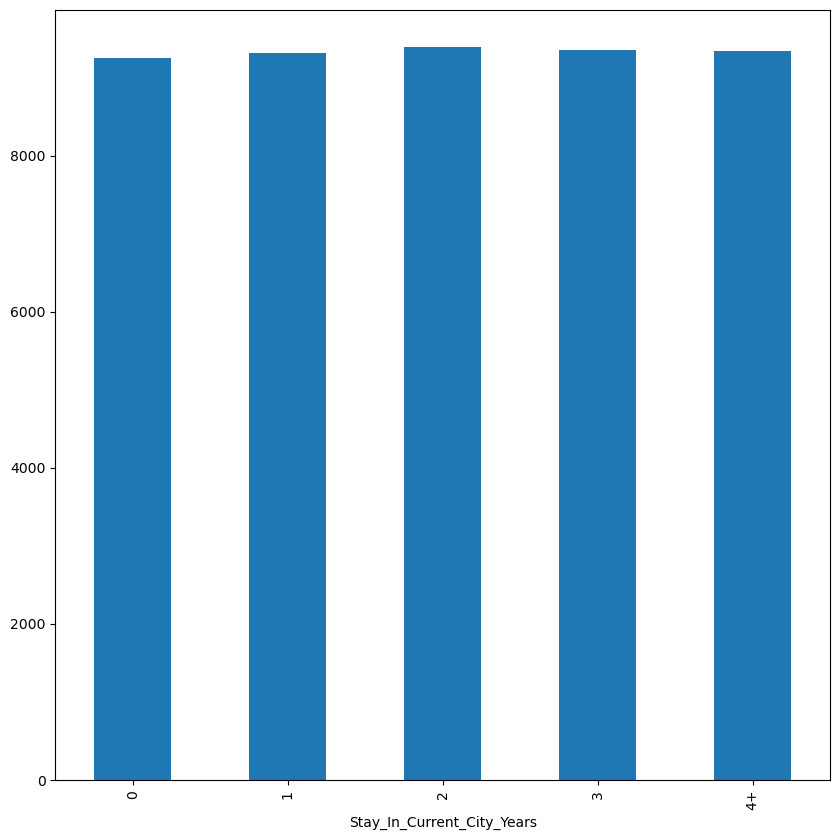

In [36]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="bar",figsize=(10,10))

In [38]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean()

Stay_In_Current_City_Years
0     9247.238625
1     9319.865095
2     9397.607316
3     9350.685121
4+    9346.370158
Name: Purchase, dtype: float64

From the bar graph, it can be observed that individuals residing for more than 4 years spend the most on their purchases, followed by those staying for 3 years, 2 years, 1 year, and less than 1 year. Additionally, the average purchase amount does not vary significantly. For this reason, residents staying for 1 year contribute more to the overall income, as their higher number of purchases compensates for the relatively similar average spending.